# Obtaining Statistical Threshold
Code written by Camila Cusicanqui

The following code is written to obtain the statistical threshold for the closing price difference for the S&P 500 financial market index. This threshold will be utilized for calculating the reward in ´environment.py´.

We are going to be fitting distributions of the following financial indicator:
* Closing price difference

First, we want to plot the distribution plot of df['Difference].

In [1]:
cd /Users/camilacusicanqui/Documents/Pedro-Pineapple/forecasting

/Users/camilacusicanqui/Documents/Pedro-Pineapple/forecasting


In [2]:
# Author: @cami_cusi 
# Gym stuff
import gymnasium as gym
import environments as ENV
import evaluation

# Stable baselines
from stable_baselines3 import A2C

# Other libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def difference(
        df:pd.DataFrame
):
    df['RPD'] = df['Close'].pct_change() * 100
    return df


In [4]:
df = pd.read_csv('/Users/camilacusicanqui/Documents/Pedro-Pineapple/data/SPY_20022006.csv')

In [6]:
train_df, _ = evaluation.data_splitter(
    raw_data=df,
    proportion=0.9
)

In [7]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,115.110001,115.750000,113.809998,115.529999,76.633728,18651900
1,2002-01-03,115.650002,116.949997,115.540001,116.839996,77.502701,15743000
2,2002-01-04,117.169998,117.980003,116.550003,117.620003,78.020126,20140700
3,2002-01-07,117.699997,117.989998,116.559998,116.790001,77.469528,13106500
4,2002-01-08,116.790001,117.059998,115.970001,116.519997,77.290428,12683700


In [8]:
train_df = difference(train_df.copy())

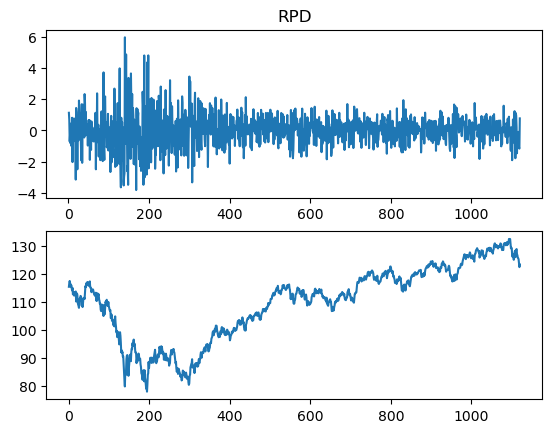

In [9]:
plt.subplot(2,1,1)
plt.plot(train_df['RPD'])
plt.title('RPD')
plt.subplot(2,1,2)
plt.plot(train_df['Close'])

Text(4.944444444444445, 0.5, 'Count')

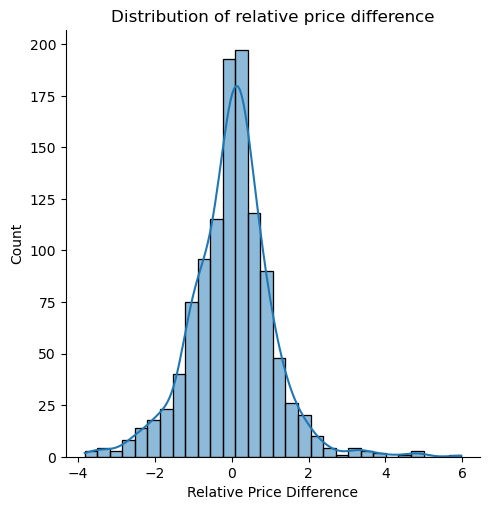

In [10]:
import seaborn as sns
sns.displot(train_df['RPD'], kde=True, bins=30)
plt.title('Distribution of relative price difference')
plt.xlabel('Relative Price Difference')
plt.ylabel('Count')

We are going to assume that our S&P 500 financial index distribution is parametric.

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt


def plot_tdist(
    dof: float,
    loc: float,
    scale: float,
    data: pd.Series
):
    x = np.linspace(min(data), max(data), 1000)
    y = t.pdf(x, dof, loc, scale)
    plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
    plt.plot(x, y, label='Fitted t-Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('t-Distribution Fit to Data')
    plt.legend()
    plt.show()


def define_threshold(
    df: pd.Series,
    lower_bound: float,
    upper_bound: float,
    override_plot: bool = False
) -> tuple:
    '''
    Fits a t-distribution to a pandas Series (df) and calculates upper
    and lower thresholds based on specified percentiles.
    It utilizes t-distribution's percent point function (ppf) to determine
    thresholds, effectively identifying the range of values corresponding
    percentiles in the data's distribution

    Parameters:

    - df (pd.Series):
        The data series to which the t-distribution is to be fitted.
    - lower_bound (float):
        The lower percentile for calculating the lower threshold.
      Value should be between 0 and 1.
    - upper_bound (float):
      The upper percentile for calculating the upper threshold.
      Value should be between 0 and 1.
    - override_plot (bool):
        If set to True, a plot of the t-distribution is generated.

    Returns:
    - tuple: A tuple containing the calculated upper and lower thresholds.
    '''

    dof, loc, scale = t.fit(df)

    if override_plot:
        plot_tdist(dof, loc, scale, df)

    if upper_bound >= lower_bound:
        upper_threshold = t.ppf(upper_bound, dof, loc, scale)
        lower_threshold = t.ppf(lower_bound, dof, loc, scale)
        if lower_threshold == upper_threshold or lower_threshold > 0:
            lower_threshold = -1 * lower_threshold
    else:
        raise ValueError(
            "Error: bounds are not consecutive. Modify extremities."
        )

    return upper_threshold, lower_threshold

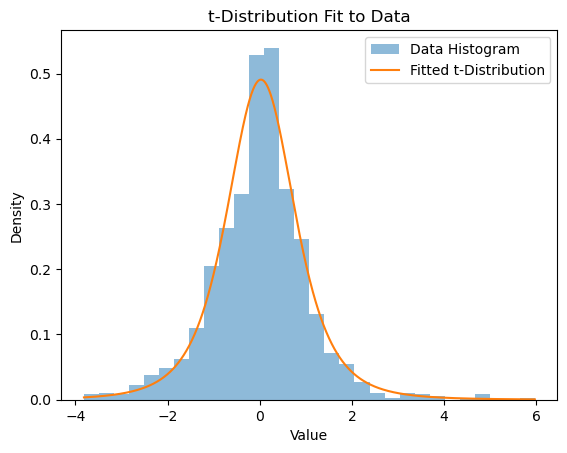

In [12]:
upper_threshold, lower_threshold = define_threshold(
    train_df['RPD'].dropna(),
    lower_bound=0.5,
    upper_bound=0.5,
    override_plot=True
    )

In [13]:
upper_threshold

0.025311283777053682

In [14]:
lower_threshold

-0.025311283777053682